In [1]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

## Task 4 - Text Classification

First we load the feature matrices and the ground truth sentiment labels that we compiled in task 3.

In [2]:
bow_data = pd.read_csv('feature_matrix_bow.csv')
tfidf_data = pd.read_csv('feature_matrix_tfidf.csv')
word2vec_data = pd.read_csv('feature_matrix_word2vec.csv')
doc2vec_data = pd.read_csv('feature_matrix_doc2vec.csv')

In [3]:
reviews = pd.read_csv('ground_truth_reviews.csv')
ground_truth = reviews['ground_truth_sentiment'].values

Now we define a function, that can apply a classifier to the feature matrix and the ground truth labels, and print out the accuracy, precision, recall, F1 score and confusion matrix.

In [4]:
def classifier(features, ground_truth, name, clf):    
    y_pred = cross_val_predict(clf, features, ground_truth, cv=5)    
    print(f'Accuracy for {name}: {accuracy_score(ground_truth, y_pred):.4f}')
    print(f"Precision for {name}: {precision_score(ground_truth, y_pred, average='weighted'):.4f}")
    print(f"Recall for {name}: {recall_score(ground_truth, y_pred, average='weighted'):.4f}")
    print(f"F1 Score for {name}: {f1_score(ground_truth, y_pred, average='weighted'):.4f}")
    
    cm = confusion_matrix(ground_truth, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(text_kw={'color': 'black'})
    plt.title(f'Confusion Matrix for Naive Bayes on {name} Features')
    plt.show()
    
    return f1_score(ground_truth, y_pred, average='weighted')

We also create a dictionary to store the F1 scores for each classifier and feature matrix combination for later comparison.

In [5]:
f1_scores = {
    "naive_bayes": {
        "bow": 0.0,
        "tfidf": 0.0,
        "word2vec": 0.0,
        "doc2vec": 0.0
    },
    "svm": {
        "bow": 0.0,
        "tfidf": 0.0,
        "word2vec": 0.0,
        "doc2vec": 0.0
    },
    "random_forest": {
        "bow": 0.0,
        "tfidf": 0.0,
        "word2vec": 0.0,
        "doc2vec": 0.0
    }
}

### 4.1. Naive Bayes Classifier
We first try using the Naive Bayes classifier on the different feature matrices. 

We selected the Naive Bayes classifier because it is simple, fast, and often effective for text classification tasks.

We use `MultinomialNB` for Bag of Words, TF-IDF, and Word2Vec. And we use `GaussianNB` for GloVe.

Accuracy for Bag of Words: 0.9580
Precision for Bag of Words: 0.9612
Recall for Bag of Words: 0.9580
F1 Score for Bag of Words: 0.9592


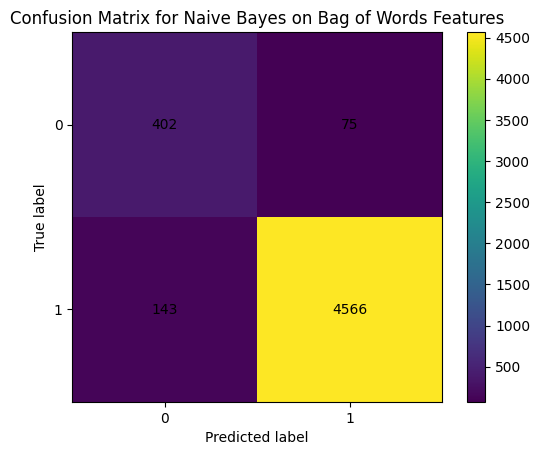

In [6]:
f1_scores["naive_bayes"]["bow"] = classifier(bow_data, ground_truth, "Bag of Words", MultinomialNB())

Accuracy for TF-IDF: 0.9321
Precision for TF-IDF: 0.9319
Recall for TF-IDF: 0.9321
F1 Score for TF-IDF: 0.9320


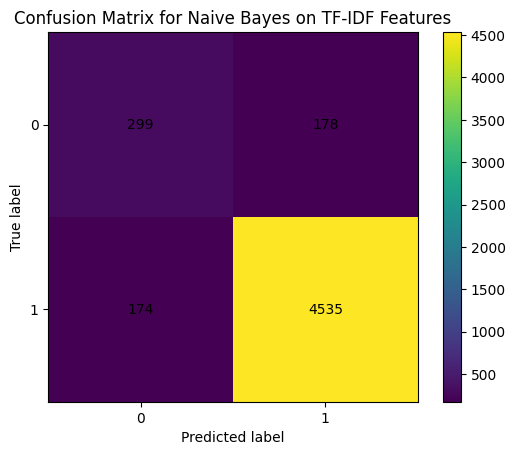

In [7]:
f1_scores["naive_bayes"]["tfidf"] = classifier(MinMaxScaler().fit_transform(tfidf_data), ground_truth, "TF-IDF", MultinomialNB())

Accuracy for Word2Vec: 0.9454
Precision for Word2Vec: 0.9586
Recall for Word2Vec: 0.9454
F1 Score for Word2Vec: 0.9495


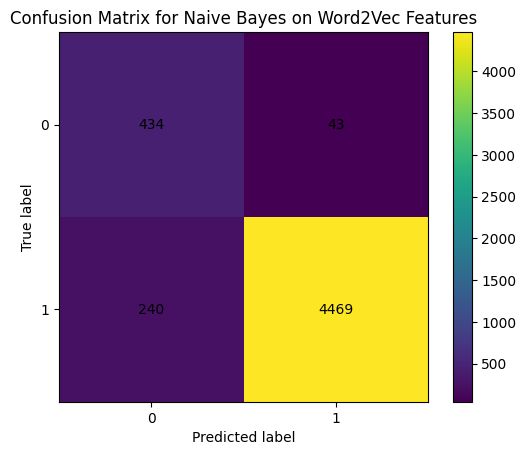

In [19]:
f1_scores["naive_bayes"]["word2vec"] = classifier(MinMaxScaler().fit_transform(word2vec_data), ground_truth, "Word2Vec", MultinomialNB())

Accuracy for Doc2Vec: 0.9080
Precision for Doc2Vec: 0.8711
Recall for Doc2Vec: 0.9080
F1 Score for Doc2Vec: 0.8657


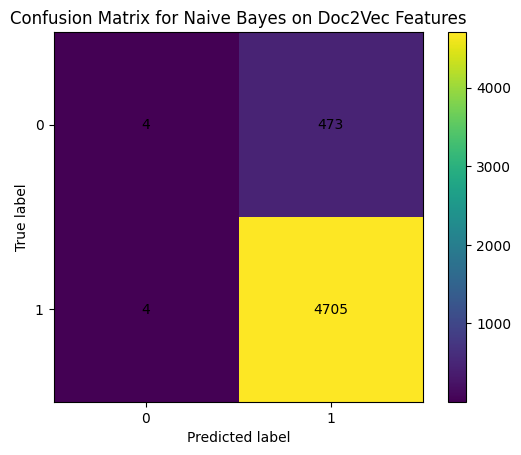

In [21]:
f1_scores["naive_bayes"]["doc2vec"] = classifier(MinMaxScaler().fit_transform(doc2vec_data), ground_truth, "Doc2Vec", MultinomialNB())

### 4.2. Support Vector Machine Classifier
Next, we apply the Support Vector Machine (SVM) classifier to the feature matrices.


We use `SVC` with a linear kernel, which is often effective for text classification tasks.

Accuracy for Bag of Words: 0.9620
Precision for Bag of Words: 0.9610
Recall for Bag of Words: 0.9620
F1 Score for Bag of Words: 0.9614


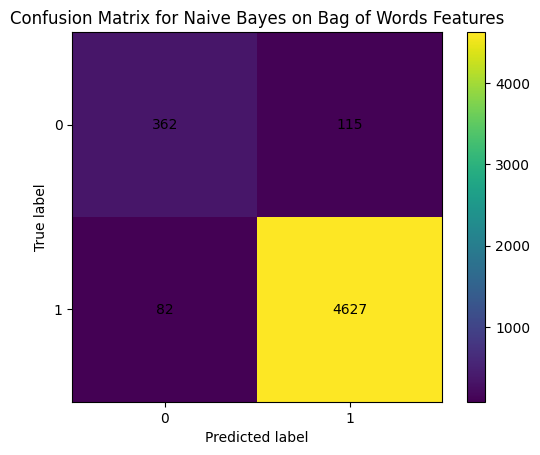

In [10]:
f1_scores["svm"]["bow"] = classifier(bow_data, ground_truth, "Bag of Words", SVC(kernel='linear'))

Accuracy for TF-IDF: 0.9636
Precision for TF-IDF: 0.9618
Recall for TF-IDF: 0.9636
F1 Score for TF-IDF: 0.9617


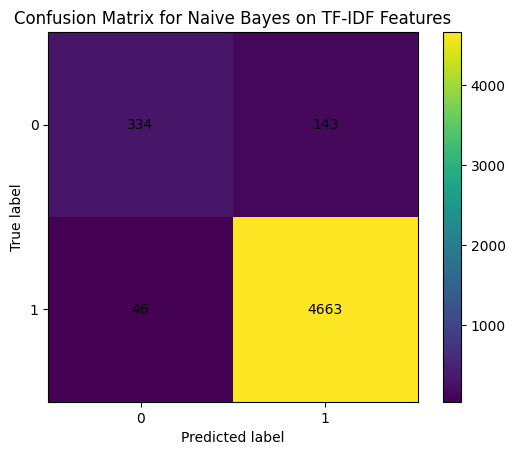

In [11]:
f1_scores["svm"]["tfidf"] = classifier(tfidf_data, ground_truth, "TF-IDF", SVC(kernel='linear'))

Accuracy for Word2Vec: 0.9668
Precision for Word2Vec: 0.9667
Recall for Word2Vec: 0.9668
F1 Score for Word2Vec: 0.9668


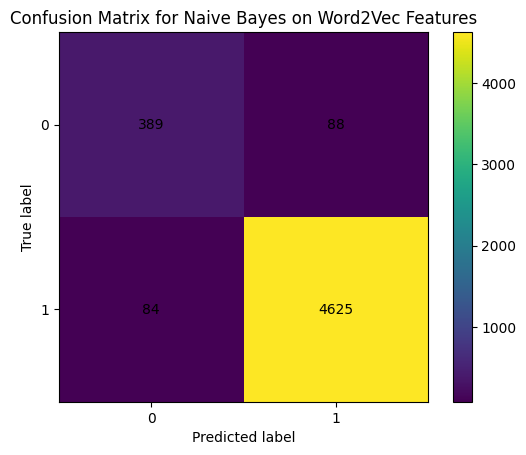

In [12]:
f1_scores["svm"]["word2vec"] = classifier(word2vec_data, ground_truth, "Word2Vec", SVC(kernel='linear'))

Accuracy for Doc2Vec: 0.9188
Precision for Doc2Vec: 0.9032
Recall for Doc2Vec: 0.9188
F1 Score for Doc2Vec: 0.9012


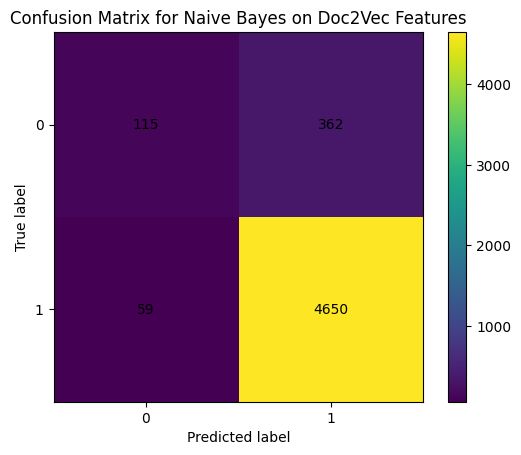

In [13]:
f1_scores["svm"]["doc2vec"] = classifier(doc2vec_data, ground_truth, "Doc2Vec", SVC(kernel='linear'))

### 4.3. Random Forest Classifier

Finally, we apply the Random Forest classifier to the feature matrices.

We use `RandomForestClassifier`, which is an ensemble method that can handle high-dimensional data and is robust to overfitting.

Accuracy for Bag of Words: 0.9420
Precision for Bag of Words: 0.9424
Recall for Bag of Words: 0.9420
F1 Score for Bag of Words: 0.9307


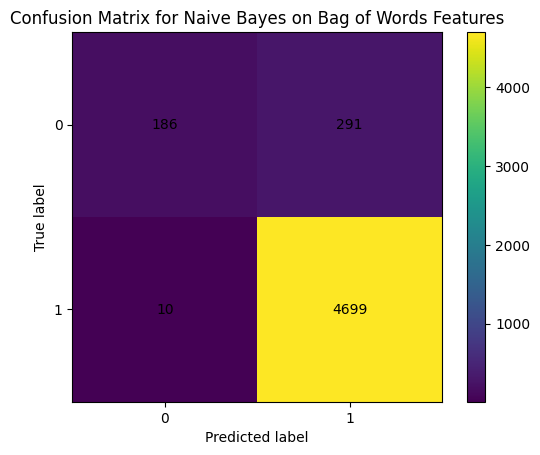

In [14]:
f1_scores["random_forest"]["bow"] = classifier(bow_data, ground_truth, "Bag of Words", RandomForestClassifier())

Accuracy for TF-IDF: 0.9377
Precision for TF-IDF: 0.9386
Recall for TF-IDF: 0.9377
F1 Score for TF-IDF: 0.9239


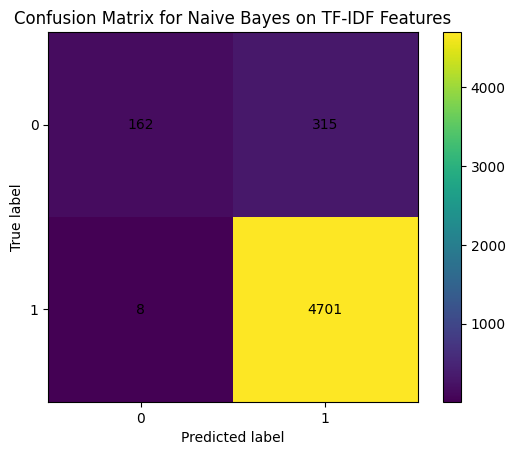

In [15]:
f1_scores["random_forest"]["tfidf"] = classifier(tfidf_data, ground_truth, "TF-IDF", RandomForestClassifier())

Accuracy for Word2Vec: 0.9614
Precision for Word2Vec: 0.9601
Recall for Word2Vec: 0.9614
F1 Score for Word2Vec: 0.9606


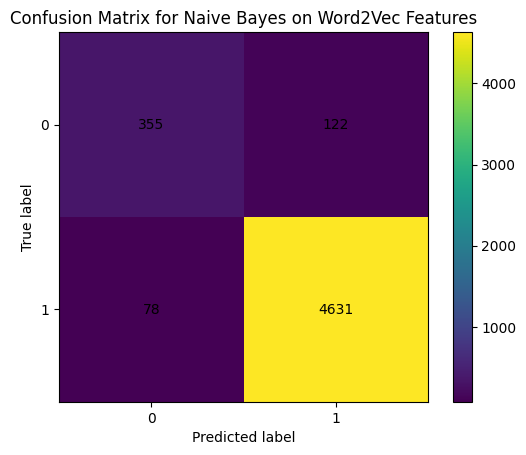

In [16]:
f1_scores["random_forest"]["word2vec"] = classifier(word2vec_data, ground_truth, "Word2Vec", RandomForestClassifier())

Accuracy for Doc2Vec: 0.9140
Precision for Doc2Vec: 0.9010
Recall for Doc2Vec: 0.9140
F1 Score for Doc2Vec: 0.8826


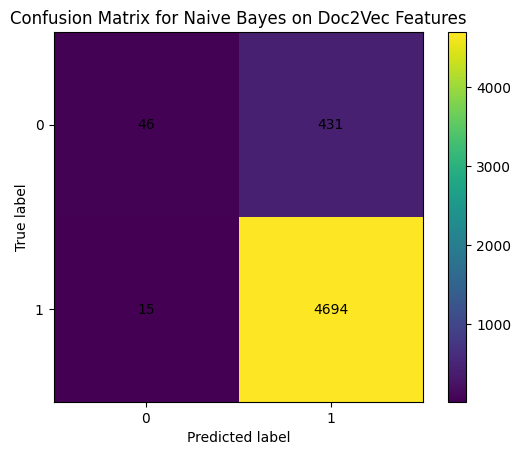

In [17]:
f1_scores["random_forest"]["doc2vec"] = classifier(doc2vec_data, ground_truth, "Doc2Vec", RandomForestClassifier())

Finally, we print out the F1 scores for each classifier and feature matrix combination in a DataFrame for easy comparison.

In [18]:
f1_df = pd.DataFrame(f1_scores)
print(f1_df)

          naive_bayes       svm  random_forest
bow          0.959209  0.961399       0.930683
tfidf        0.931996  0.961679       0.923923
word2vec     0.949517  0.966771       0.960592
doc2vec      0.820298  0.901193       0.882569


From the results, we can see that the SVM classifier with Word2Vec has the highest F1 score.